In [84]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
Xb,yb =load_boston(return_X_y=True)

df_boston = pd.DataFrame(Xb,columns = load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [86]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [87]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


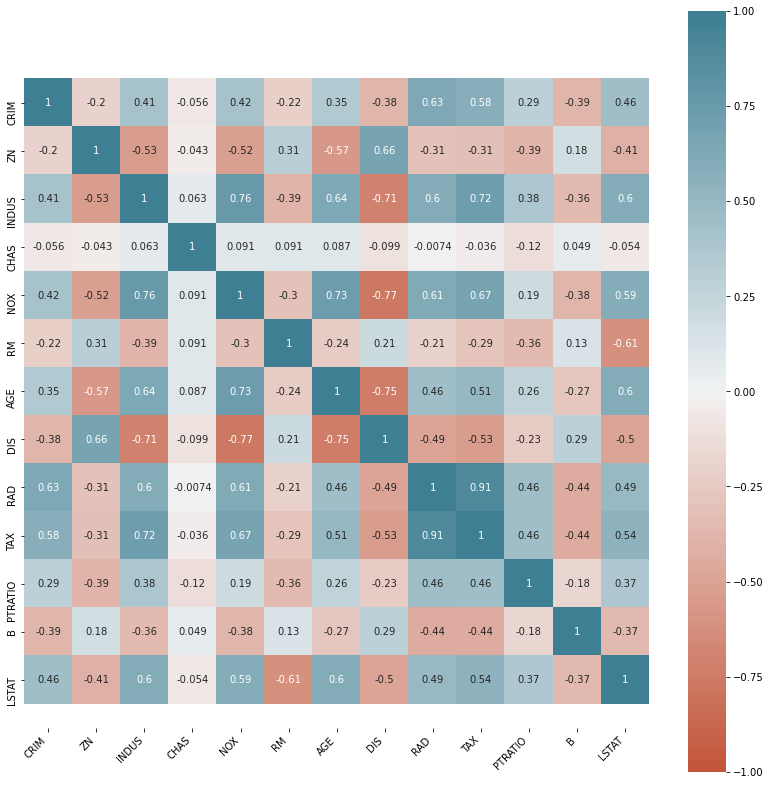

In [88]:
import seaborn as sns
corr = df_boston.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [89]:
# Dropping colerated features
new_df = df_boston.drop(["AGE","INDUS"],axis=1)
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [90]:
new_df = new_df.apply(lambda x: x.fillna(x.median()), axis = 0)

In [91]:
#outliers and scaling
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_boston))
z
outliers = list(set(np.where(z > 3)[0]))
new_df = df_boston.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = yb[list(new_df["index"])]
len(y_new)
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
411,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
412,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
413,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


array([[-0.50009668,  0.42727822, -1.25466328, ..., -1.48379449,
         0.43991388, -1.1282211 ],
       [-0.49580542, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.43991388, -0.48493501],
       [-0.49580951, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.36091635, -1.27512537],
       ...,
       [-0.4889668 , -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -1.02616129],
       [-0.47898384, -0.48858069,  0.16203913, ...,  1.18595212,
         0.37295037, -0.89626698],
       [-0.49169611, -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -0.67977647]])

In [92]:
#Split into train, test set
from sklearn.model_selection import train_test_split
X_alls = StandardScaler().fit_transform(Xb)
X_train, X_test, y_train, y_test = train_test_split(X_alls,yb, test_size=0.3, random_state=42)

Regularized Ridge Regression

In [93]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [94]:
#for alpha=0.0001
ridge_model = Ridge(alpha = 0.0001)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Ridge model coef: [-1.14691275  0.8343238   0.33940394  0.7916367  -1.7847234   2.84784018
 -0.30429337 -2.91562117  2.11139173 -1.46519177 -1.96963368  1.07567738
 -3.90310571]
Ridge Train:  0.7434997532002823
Ridge Test:  0.711225963972677


In [95]:
#for alpha=1
ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Ridge model coef: [-1.13365516  0.81262797  0.31056626  0.7972542  -1.74952321  2.85445566
 -0.30726221 -2.87598555  2.02782455 -1.39149645 -1.95966184  1.07243684
 -3.88766412]
Ridge Train:  0.7434821404219876
Ridge Test:  0.7108092176450822


In [96]:
#for alpha=10
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Ridge model coef: [-1.04040626  0.66864277  0.12846482  0.83388741 -1.49067193  2.89287727
 -0.32262973 -2.57086271  1.49677766 -0.95530252 -1.88328338  1.04572559
 -3.759766  ]
Ridge Train:  0.7423614518289573
Ridge Test:  0.7073353302794305


In [97]:
#for alpha=100
ridge_model = Ridge(alpha = 100)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Ridge model coef: [-0.73806008  0.34130753 -0.27647295  0.89684956 -0.67086968  2.74188362
 -0.29815316 -1.30339601  0.31528153 -0.38009453 -1.52927913  0.8601211
 -2.94507697]
Ridge Train:  0.7177716321456495
Ridge Test:  0.6850953357359876


In [98]:
#for alpha=0.02
ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))

Ridge model coef: [-1.1466412   0.83387653  0.33880573  0.79175277 -1.78400712  2.84797793
 -0.30435599 -2.91481868  2.10965955 -1.46365288 -1.96943154  1.07561215
 -3.90279536]
Ridge Train:  0.7434997457153416
Ridge Test:  0.7112176507843931


Regularized Lasso Regression

In [99]:
#for alpha=0.001
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Lasso model coef: [-1.14367746  0.82903263  0.32989579  0.79212961 -1.77790229  2.84816356
 -0.30235674 -2.90863703  2.09277492 -1.44683198 -1.96776321  1.07426349
 -3.90320452]
Lasso Train:  0.7434989142363777
Lasso Test:  0.7111720381572426


In [100]:
#for alpha=1
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Lasso model coef: [-0.          0.         -0.          0.24436267 -0.          2.69009739
 -0.         -0.         -0.         -0.         -1.24246422  0.22067934
 -3.75175215]
Lasso Train:  0.6767273490708468
Lasso Test:  0.6445091566032185


In [101]:
#for alpha=0.02
lasso_model = Lasso(alpha = 0.02)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Lasso model coef: [-1.08234864  0.72842125  0.15095962  0.80135223 -1.64818515  2.85442689
 -0.26569341 -2.7750645   1.74100129 -1.10020847 -1.93250134  1.04759112
 -3.90516187]
Lasso Train:  0.743167016089189
Lasso Test:  0.7096569636180649


In [102]:
#for alpha=0.5
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Lasso model coef: [-0.28653341  0.         -0.          0.59019874 -0.          2.92008183
 -0.         -0.24337446 -0.         -0.         -1.46573943  0.61503958
 -3.86926192]
Lasso Train:  0.7064311028566421
Lasso Test:  0.6603670305356104


In [103]:
#for alpha=0.0006
lasso_model = Lasso(alpha = 0.0006)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Lasso model coef: [-1.14497209  0.83114299  0.33371344  0.79193258 -1.78064119  2.8480401
 -0.30313928 -2.91142809  2.10022787 -1.45418067 -1.96851626  1.07483063
 -3.9031587 ]
Lasso Train:  0.7434994515705916
Lasso Test:  0.7111937435296136
